<a href="https://colab.research.google.com/github/dsnato/imersao-dados-python/blob/main/projeto_ml_dataset_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de ML com Dataset Iris

In [4]:
# 1. Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, accuracy_score, silhouette_score

In [5]:
# Configurações para gráficos
sns.set(style='whitegrid')
%matplotlib inline

In [9]:
# 2. Carregar e eplorar o dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names) # Features
y = pd.Series(iris.target, name='species') # Target numérica
y_labels = pd.Series([iris.target_names[i] for i in y], name='species_name')

In [17]:
# Visualizar primeira linhas
print(X.head())
print('-' * 100)
print(y_labels.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
----------------------------------------------------------------------------------------------------
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species_name, dtype: object


In [18]:
# Estatísticas descritivas
print(X.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


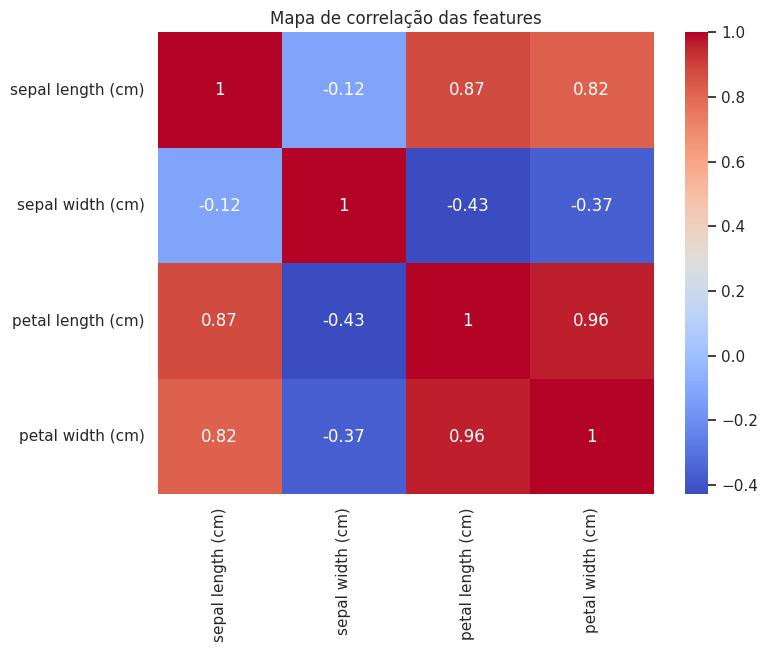

In [22]:
# Verificar correlação entre features
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de correlação das features')
plt.show()

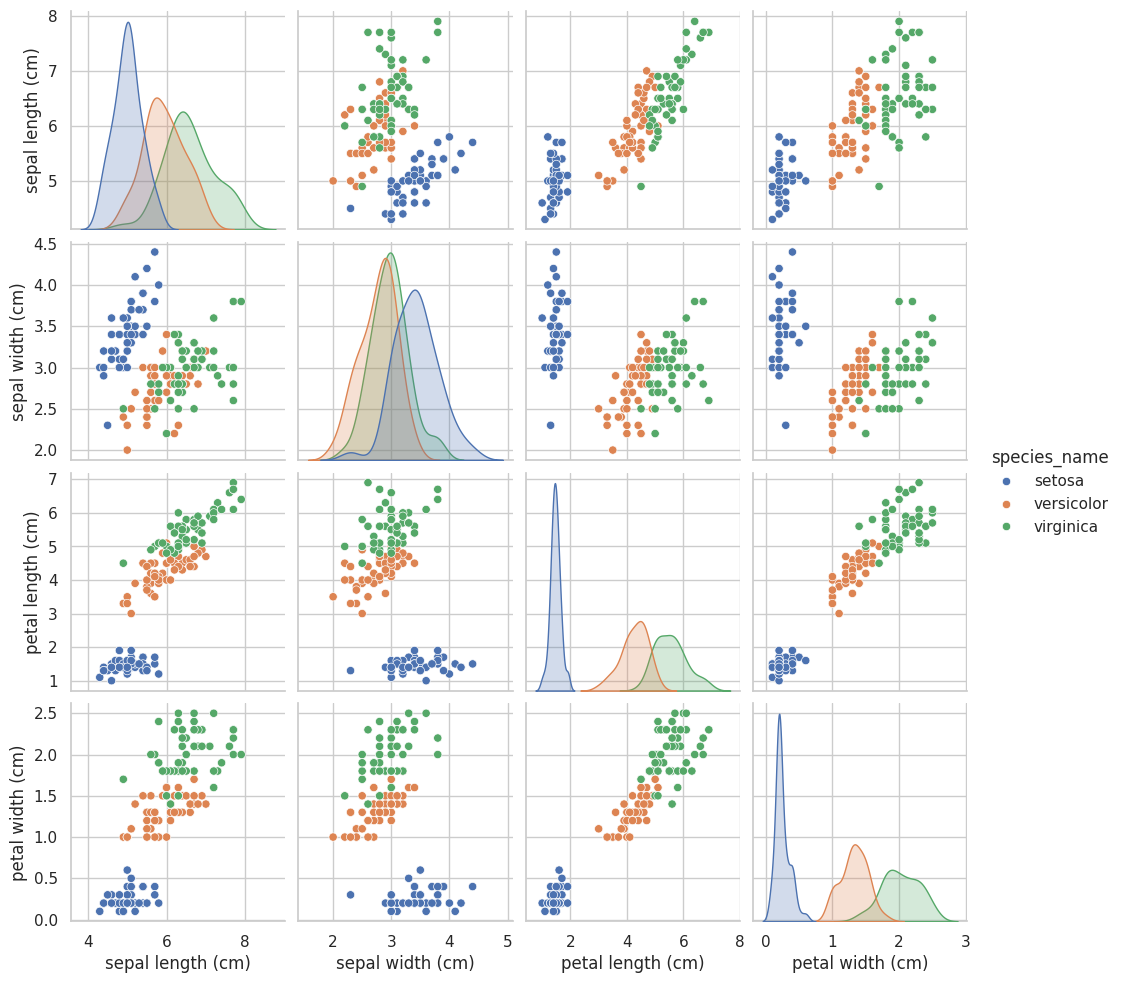

In [25]:
#Pairplot para visualização da distribuição por espécie
sns.pairplot(pd.concat([X, y_labels], axis=1), hue='species_name')
plt.show()

In [28]:
# 3. Regressão: Prever comprimento da pétala (petal length)

# Usaremos as outras features como preditores
y_reg = X['petal length (cm)']
X_reg = X.drop(columns=['petal length (cm)'])

In [29]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [30]:
# Treinar modelo de regressão linear
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Previsões
y_pred = reg_model.predict(X_test)

In [34]:
# Avaliar desempenho
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE da Regressão Linear: {rmse:.3f}')

RMSE da Regressão Linear: 0.361


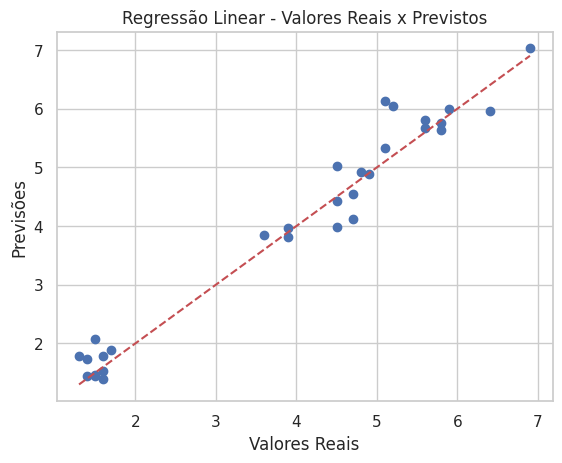

In [38]:
# Visualização
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Regressão Linear - Valores Reais x Previstos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--' )
plt.show()

In [44]:
# 4. Classificação: Prever espécie

# Separar treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#Treinar modelo de classificação
clf_model = LogisticRegression(max_iter=200)
clf_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [43]:
# Previsões
y_pred_class = clf_model.predict(X_test)

In [47]:
# Avaliação
acc = accuracy_score(y_test, y_pred_class)
print(f'Acurácia da Classificação: {acc:.3f}')

Acurácia da Classificação: 1.000


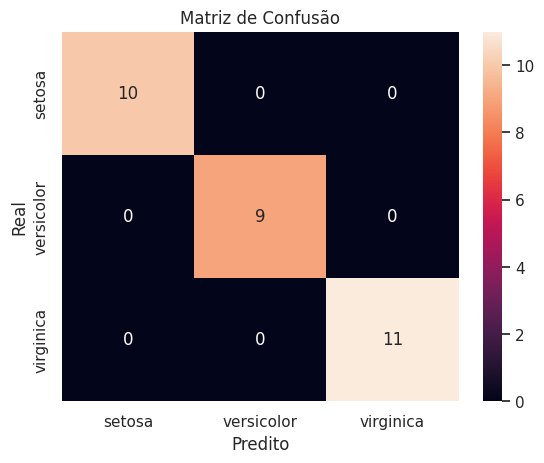

In [51]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [53]:
# Clusterização: K-means

# Escalar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [56]:
# Avaliar com silhouette score
sil_score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score do K-Means: {sil_score:.3f}')

Silhouette Score do K-Means: 0.480


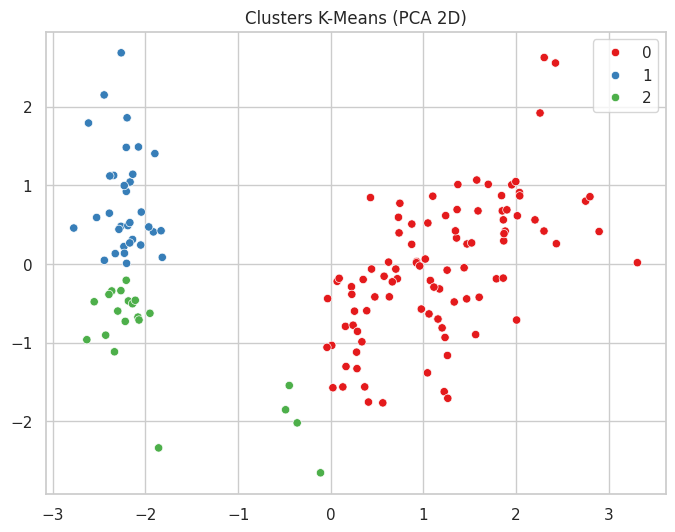

In [62]:
# Visualizar clusters com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set1')
plt.title('Clusters K-Means (PCA 2D)')
plt.show()

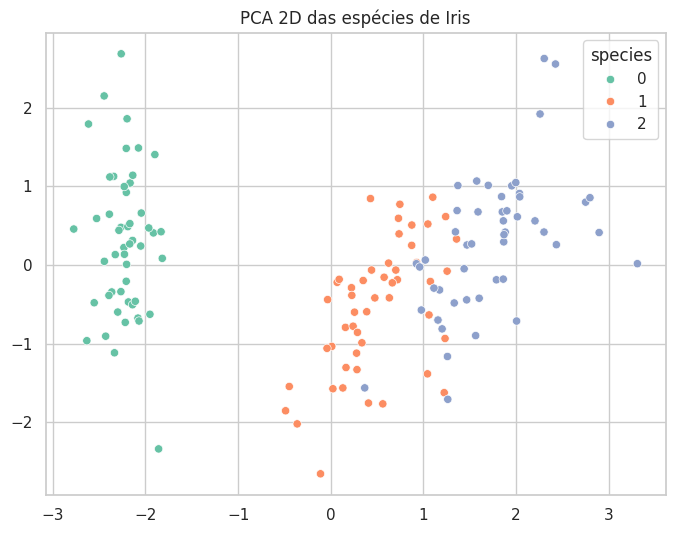

In [66]:
# 6. Redução de Dimensionalidade: PCA para visualização
pca_2 = PCA(n_components=2)
X_pca2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=y, palette='Set2')
plt.title('PCA 2D das espécies de Iris')
plt.show()

In [68]:
#Explicando variância explicada
explained_var = pca_2.explained_variance_ratio_
print(f'Variância explicada pelos 2 componentes: {explained_var}')

Variância explicada pelos 2 componentes: [0.72962445 0.22850762]
